First 5 records:
  customer_id  last_purchase_days  purchase_frequency  average_spend  \
0        C001                  10                  12           4500   
1        C002                  45                   3           1200   
2        C003                   5                  15           5200   
3        C004                  60                   2            900   
4        C005                  20                   8           3000   

  category_switch payment_change  
0              No             No  
1             Yes            Yes  
2              No             No  
3             Yes             No  
4              No            Yes  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         10 non-null     object
 1   last_purchase_days  10 non-null     int64 
 2   purchase_frequency  10 non-

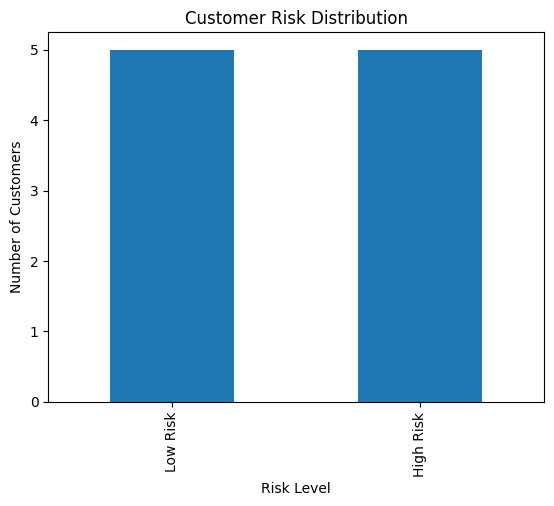

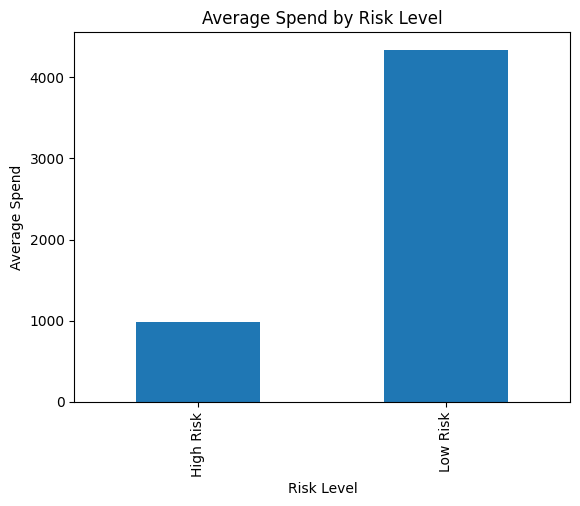

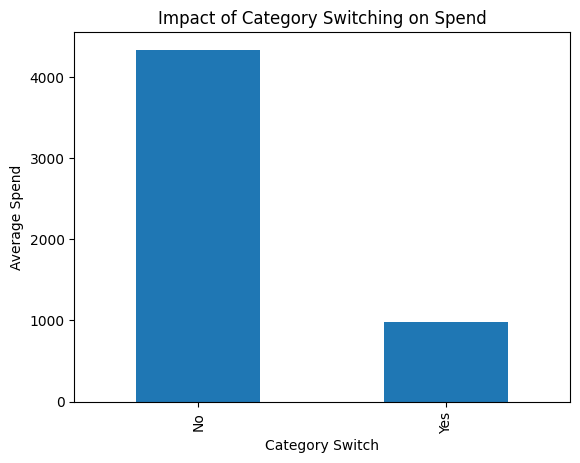

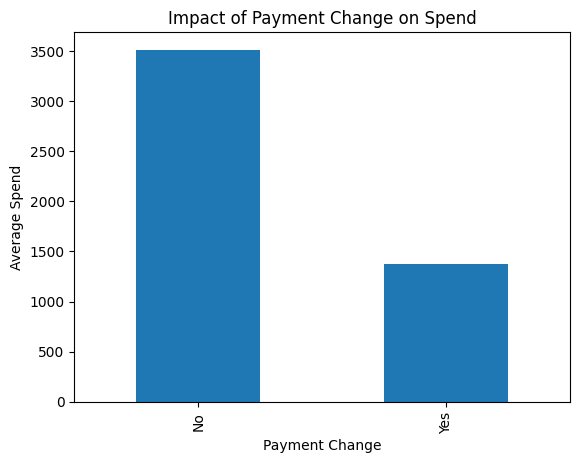


Key Insights:
- Customers with long purchase gaps show higher churn risk
- High-risk customers have lower average spending
- Category switching indicates unstable customer behavior
- Payment method changes are early churn warning signals


In [2]:
# Customer Pre-Churn Behavioral Analysis
# -------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("customer_behavior.csv")

# Display basic information
print("First 5 records:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Create risk flag based on last purchase gap
df['risk_flag'] = df['last_purchase_days'].apply(
    lambda x: 'High Risk' if x > 40 else 'Low Risk'
)

# Risk distribution
print("\nRisk Distribution:")
print(df['risk_flag'].value_counts())

# Plot risk distribution
df['risk_flag'].value_counts().plot(kind='bar')
plt.title("Customer Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Customers")
plt.show()

# Average spend comparison
df.groupby('risk_flag')['average_spend'].mean().plot(kind='bar')
plt.title("Average Spend by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Average Spend")
plt.show()

# Category switching impact
df.groupby('category_switch')['average_spend'].mean().plot(kind='bar')
plt.title("Impact of Category Switching on Spend")
plt.xlabel("Category Switch")
plt.ylabel("Average Spend")
plt.show()

# Payment change impact
df.groupby('payment_change')['average_spend'].mean().plot(kind='bar')
plt.title("Impact of Payment Change on Spend")
plt.xlabel("Payment Change")
plt.ylabel("Average Spend")
plt.show()

# Final insights
print("\nKey Insights:")
print("- Customers with long purchase gaps show higher churn risk")
print("- High-risk customers have lower average spending")
print("- Category switching indicates unstable customer behavior")
print("- Payment method changes are early churn warning signals")
